# Лабораторная работа №2
## Задания
1. Существует ли связь между количеством детей и своевременным погашением кредита?
2. Имеет ли влияние семейное положение на возврат кредита в оговоренный срок?
3. Есть ли зависимость между уровнем дохода заемщика и своевременным погашением задолженности?
4. Как цели, на которые берется кредит, влияют на его возврат в срок?

In [61]:
import pandas as pd
from matplotlib import pyplot as plt

credit_data = pd.read_csv('/Users/denisovamaria/PyCharmData/lab2Data.csv')
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   child          21525 non-null  int64  
 1   d_employed     19351 non-null  float64
 2   age            21525 non-null  int64  
 3   ed             21525 non-null  object 
 4   ed_id          21525 non-null  int64  
 5   fam_status     21525 non-null  object 
 6   fam_status_id  21525 non-null  int64  
 7   gender         21525 non-null  object 
 8   occupation     21525 non-null  object 
 9   debt           21525 non-null  int64  
 10  total_income   19351 non-null  float64
 11  purpose        21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [32]:
credit_data.describe()

,child,d_employed,age,ed_id,fam_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


# Обработка данных

## Обработка дубликатов

In [33]:
credit_data.drop_duplicates(inplace=True)
credit_data.describe()

,child,d_employed,age,ed_id,fam_status_id,debt,total_income
count,21471.000000,19351.000000,21471.000000,21471.000000,21471.000000,21471.000000,1.935100e+04
mean,0.539565,63046.497661,43.279074,0.817195,0.973685,0.081086,1.674223e+05
std,1.382978,140827.311974,12.574291,0.548508,1.421082,0.272974,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


## Обработка информации о детей 

In [34]:
credit_data.child = credit_data.child.apply(lambda x: abs(x) if x < 0 else x)
credit_data.child.describe()

count    21471.000000
mean         0.543943
std          1.381262
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: child, dtype: float64

In [35]:
credit_data.child.describe()

count    21471.000000
mean         0.543943
std          1.381262
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: child, dtype: float64

## Обработка информации о стаже

In [36]:
credit_data.d_employed = credit_data.d_employed.apply(lambda x: abs(x) if x < 0 else x)
credit_data.d_employed.describe()

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: d_employed, dtype: float64

In [37]:
def d_employed_info(row):
    if row['d_employed'] // 365 > row['age'] - 14:
        return row['d_employed'] / 24
    else:
        return row['d_employed']


credit_data['d_employed'] = credit_data.apply(d_employed_info, axis=1)


In [38]:
credit_data.d_employed = credit_data.d_employed.fillna(credit_data.d_employed.median())

In [39]:
credit_data.describe()

,child,d_employed,age,ed_id,fam_status_id,debt,total_income
count,21471.000000,21471.000000,21471.000000,21471.000000,21471.000000,21471.000000,1.935100e+04
mean,0.543943,4386.494667,43.279074,0.817195,0.973685,0.081086,1.674223e+05
std,1.381262,5137.699982,12.574291,0.548508,1.421082,0.272974,1.029716e+05
min,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,1015.000000,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,2183.000000,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,4778.000000,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,16739.000000,75.000000,4.000000,4.000000,1.000000,2.265604e+06


## Обработка информации о возрасте 

In [40]:
credit_data = credit_data[credit_data.age >= 18]
credit_data.age.describe()

count    21370.000000
mean        43.483622
std         12.246029
min         19.000000
25%         33.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: age, dtype: float64

## Обработка информации об образовании и семье

In [41]:
def lower_info(credit_data, a):
    credit_data[a] = credit_data[a].str.lower()


display(credit_data.fam_status.describe())
display(credit_data.ed.describe())
display(credit_data.occupation.describe())

count               21370
unique                  5
top       женат / замужем
freq                12295
Name: fam_status, dtype: object

count       21370
unique         15
top       среднее
freq        13646
Name: ed, dtype: object

count         21370
unique            8
top       сотрудник
freq          11036
Name: occupation, dtype: object

## Обработка данных о поле

In [42]:
lower_info(credit_data, 'ed')
lower_info(credit_data, 'occupation')
display(credit_data.ed.describe())
display(credit_data.occupation.describe())

count       21370
unique          5
top       среднее
freq        15124
Name: ed, dtype: object

count         21370
unique            8
top       сотрудник
freq          11036
Name: occupation, dtype: object

In [43]:
credit_data = credit_data[(credit_data.gender == 'M') | (credit_data.gender == 'F')]

In [44]:
credit_data.gender.describe()

count     21369
unique        2
top           F
freq      14117
Name: gender, dtype: object

## Обработка данных о цели кредита

In [45]:
print(credit_data.purpose.unique())

['строительство собственной недвижимости'
 'строительство жилой недвижимости'
 'операции с коммерческой недвижимостью' 'жилье' 'на проведение свадьбы'
 'покупка жилья' 'операции со своей недвижимостью' 'автомобили'
 'приобретение автомобиля' 'образование' 'заняться образованием'
 'покупка недвижимости' 'сделка с подержанным автомобилем'
 'получение образования' 'на покупку своего автомобиля' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'сыграть свадьбу' 'недвижимость' 'операции с недвижимостью'
 'получение высшего образования' 'операции с жильем'
 'покупка жилья для семьи' 'покупка коммерческой недвижимости'
 'на покупку подержанного автомобиля' 'свой автомобиль'
 'сделка с автомобилем' 'профильное образование' 'высшее образование'
 'покупка жилья для сдачи' 'покупка жилой недвижимости'
 'строительство недвижимости' 'на покупку автомобиля' 'ремонт жилью'
 'дополнительное образование' 'заняться высшим образованием']


In [46]:
def transform_purpose(purpose):
    if purpose in [
        'строительство собственной недвижимости',
        'строительство жилой недвижимости',
        'операции с коммерческой недвижимостью',
        'жилье',
        'покупка жилья',
        'покупка недвижимости',
        'операции со своей недвижимостью',
        'покупка своего жилья',
        'операции с недвижимостью',
        'операции с жильем',
        'покупка жилья для семьи',
        'покупка коммерческой недвижимости',
        'покупка жилья для сдачи',
        'покупка жилой недвижимости',
        'строительство недвижимости',
        'ремонт жилью'
    ]:
        return 'недвижимость'
    elif purpose in [
        'на проведение свадьбы',
        'сыграть свадьбу'
    ]:
        return 'свадьба'
    elif purpose in [
        'автомобили',
        'приобретение автомобиля',
        'сделка с подержанным автомобилем',
        'на покупку своего автомобиля',
        'на покупку подержанного автомобиля',
        'свой автомобиль',
        'сделка с автомобилем',
        'на покупку автомобиля'
    ]:
        return 'автомобиль'
    elif purpose in [
        'заняться образованием',
        'получение образования',
        'получение дополнительного образования',
        'получение высшего образования',
        'профильное образование',
        'высшее образование',
        'дополнительное образование',
        'заняться высшим образованием'
    ]:
        return 'образование'
    else:
        return purpose


credit_data.purpose = credit_data.purpose.apply(transform_purpose)


In [47]:
credit_data.purpose.describe()

count            21369
unique               4
top       недвижимость
freq             10766
Name: purpose, dtype: object

In [48]:
credit_data.describe()

,child,d_employed,age,ed_id,fam_status_id,debt,total_income
count,21369.000000,21369.000000,21369.000000,21369.00000,21369.000000,21369.000000,1.925900e+04
mean,0.543357,4393.967991,43.484534,0.81782,0.972437,0.081099,1.674633e+05
std,1.377061,5134.523938,12.245590,0.54855,1.420533,0.272993,1.030897e+05
min,0.000000,24.000000,19.000000,0.00000,0.000000,0.000000,2.066726e+04
25%,0.000000,1023.000000,33.000000,1.00000,0.000000,0.000000,1.030929e+05
50%,0.000000,2183.000000,43.000000,1.00000,0.000000,0.000000,1.450055e+05
75%,1.000000,4787.000000,53.000000,1.00000,1.000000,0.000000,2.033503e+05
max,20.000000,16739.000000,75.000000,4.00000,4.000000,1.000000,2.265604e+06


## Обработка данных о зарплате

In [49]:
credit_data.total_income = credit_data.total_income.fillna(credit_data.total_income.median())
credit_data.describe()

,child,d_employed,age,ed_id,fam_status_id,debt,total_income
count,21369.000000,21369.000000,21369.000000,21369.00000,21369.000000,21369.000000,2.136900e+04
mean,0.543357,4393.967991,43.484534,0.81782,0.972437,0.081099,1.652458e+05
std,1.377061,5134.523938,12.245590,0.54855,1.420533,0.272993,9.809662e+04
min,0.000000,24.000000,19.000000,0.00000,0.000000,0.000000,2.066726e+04
25%,0.000000,1023.000000,33.000000,1.00000,0.000000,0.000000,1.077064e+05
50%,0.000000,2183.000000,43.000000,1.00000,0.000000,0.000000,1.450055e+05
75%,1.000000,4787.000000,53.000000,1.00000,1.000000,0.000000,1.957379e+05
max,20.000000,16739.000000,75.000000,4.00000,4.000000,1.000000,2.265604e+06


In [50]:
def total_income(income):
    if income <= 30000:
        return "низкая"
    elif income >= 30000 and income <= 50000:
        return "выше среднего"
    elif income >= 50000 and income <= 200000:
        return "средняя"
    elif income >= 200000 and income <= 1000000:
        return "ниже среднего"
    else:
        return "высокая"


credit_data.total_income = credit_data.total_income.apply(total_income)

In [51]:
credit_data.total_income.describe()

count       21369
unique          5
top       средняя
freq        15960
Name: total_income, dtype: object

In [52]:
credit_data.describe()

,child,d_employed,age,ed_id,fam_status_id,debt
count,21369.000000,21369.000000,21369.000000,21369.00000,21369.000000,21369.000000
mean,0.543357,4393.967991,43.484534,0.81782,0.972437,0.081099
std,1.377061,5134.523938,12.245590,0.54855,1.420533,0.272993
min,0.000000,24.000000,19.000000,0.00000,0.000000,0.000000
25%,0.000000,1023.000000,33.000000,1.00000,0.000000,0.000000
50%,0.000000,2183.000000,43.000000,1.00000,0.000000,0.000000
75%,1.000000,4787.000000,53.000000,1.00000,1.000000,0.000000
max,20.000000,16739.000000,75.000000,4.00000,4.000000,1.000000


## Задание 1
## Существует ли связь между количеством детей и своевременным погашением кредита?

In [53]:
n = credit_data.groupby("child")["debt"].size()
credit_data_child = credit_data.loc[credit_data.debt == 1].groupby("child")["debt"].size()
display(credit_data_child)
credit_data_child = credit_data_child / n

child
0     1058
1      442
2      194
3       27
4        4
20       8
Name: debt, dtype: int64

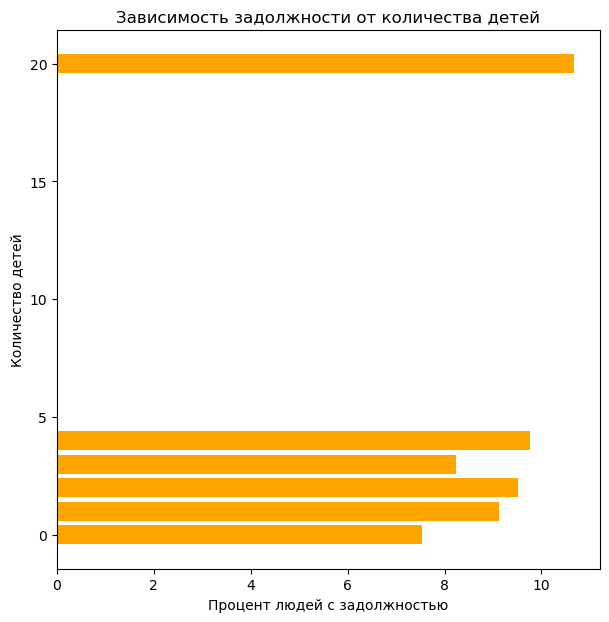

In [54]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.barh(credit_data_child.index, credit_data_child.values * 100, color='')
ax.set_xlabel('Процент людей с задолжностью')
ax.set_ylabel('Количество детей')
ax.set_title('Зависимость задолжности от количества детей')
plt.show()

## Задание 2
## Имеет ли влияние семейное положение на возврат кредита в оговоренный срок?

In [55]:
n = credit_data.groupby("fam_status")["debt"].size()
credit_data_fam_status = credit_data.loc[credit_data.debt == 1].groupby("fam_status")["debt"].size()
credit_data_fam_status = credit_data_fam_status / n


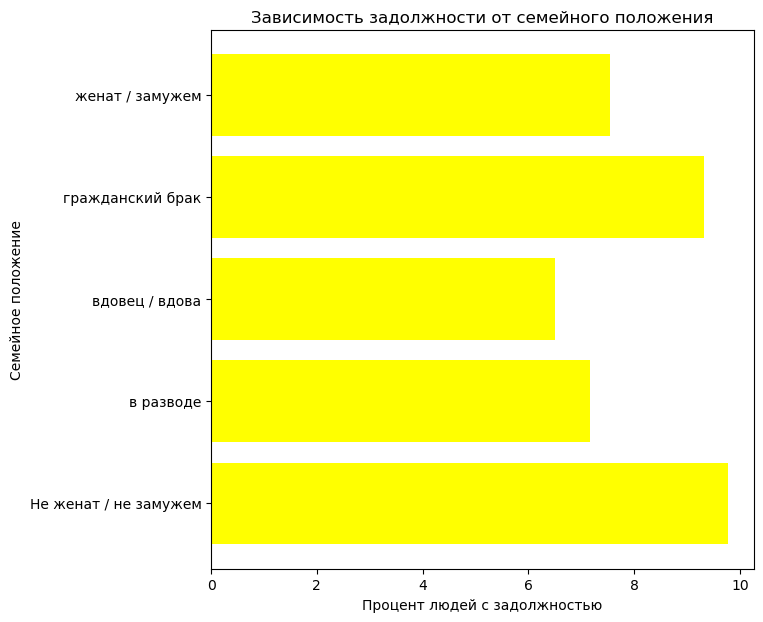

In [56]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.barh(credit_data_fam_status.index, credit_data_fam_status.values * 100, color='yellow')
ax.set_xlabel('Процент людей с задолжностью')
ax.set_ylabel('Семейное положение')
ax.set_title('Зависимость задолжности от семейного положения')
plt.show()

## Задание 3
## Есть ли зависимость между уровнем дохода заемщика и своевременным погашением задолженности?

In [57]:
n = credit_data.groupby("total_income")["debt"].size()
credit_data_income = credit_data.loc[credit_data.debt == 1].groupby("total_income")["debt"].size()
credit_data_income = credit_data_income / n

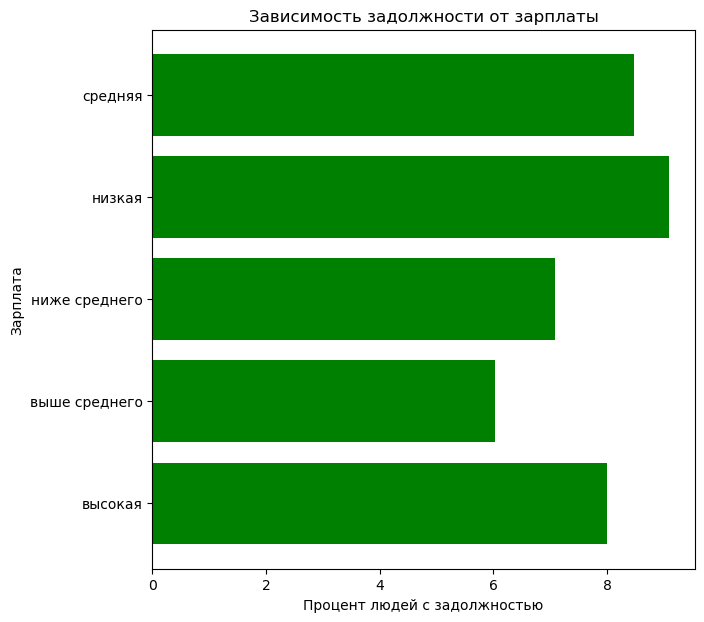

In [58]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.barh(credit_data_income.index, credit_data_income.values * 100, color='green')
ax.set_xlabel('Процент людей с задолжностью')
ax.set_ylabel('Зарплата')
ax.set_title('Зависимость задолжности от зарплаты')
plt.show()

## Задание 4
## Как цели, на которые берется кредит, влияют на его возврат в срок?

In [59]:
n = credit_data.groupby("purpose")["debt"].size()
credit_data_purpose = credit_data.loc[credit_data.debt == 1].groupby("purpose")["debt"].size()
credit_data_purpose = credit_data_purpose / n

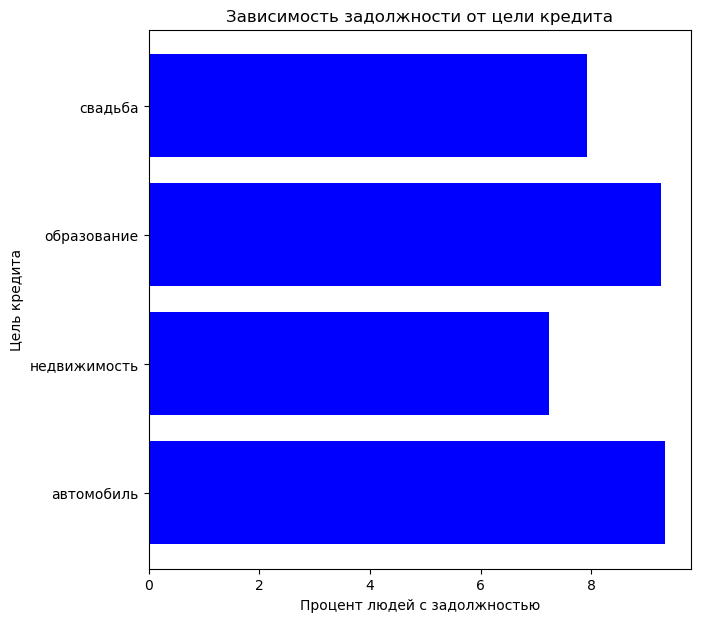

In [60]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.barh(credit_data_purpose.index, credit_data_purpose.values * 100, color='blue')
ax.set_xlabel('Процент людей с задолжностью')
ax.set_ylabel('Цель кредита')
ax.set_title('Зависимость задолжности от цели кредита')
plt.show()